In [1]:
! git clone https://github.com/rixprakash/ds3001group

Cloning into 'ds3001group'...
remote: Enumerating objects: 380, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 380 (delta 121), reused 144 (delta 63), pack-reused 133 (from 1)
Receiving objects: 100% (380/380), 30.83 MiB | 12.01 MiB/s, done.
Resolving deltas: 100% (163/163), done.


In [2]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read in files

poverty = pd.read_csv("/content/ds3001group/arizona/azpoverty.csv")
outcomes = pd.read_excel("/content/ds3001group/arizona/arizonaoutcomes.xlsx")
outcomes2012 = outcomes[outcomes['year'] == 2012]
outcomes2016 = outcomes[outcomes['year'] == 2016]
outcomes2020 = outcomes[outcomes['year'] == 2020]

In [5]:
azdemographics2012 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2012.xlsx")
azdemographics2016 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2016.xlsx")
azdemographics2020 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2020.xlsx")
azdemographics2012 = azdemographics2012[azdemographics2012['State Name'] == "Arizona"]
azdemographics2016 = azdemographics2016[azdemographics2016['State Name'] == "Arizona"]
azdemographics2020 = azdemographics2020[azdemographics2020['State Name'] == "Arizona"]
azdemographics2012['County Name'] = azdemographics2012['County Name'].str.upper()
azdemographics2012['County Name'] = azdemographics2012['County Name'].str.replace(' COUNTY', '')
azdemographics2016['County Name'] = azdemographics2016['County Name'].str.upper()
azdemographics2016['County Name'] = azdemographics2016['County Name'].str.replace(' COUNTY', '')
azdemographics2020['County Name'] = azdemographics2020['County Name'].str.upper()
azdemographics2020['County Name'] = azdemographics2020['County Name'].str.replace(' COUNTY', '')

<ipython-input-5-82bc07d6c7f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdemographics2012['County Name'] = azdemographics2012['County Name'].str.upper()
<ipython-input-5-82bc07d6c7f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdemographics2012['County Name'] = azdemographics2012['County Name'].str.replace(' COUNTY', '')
<ipython-input-5-82bc07d6c7f3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [6]:
# Wrangling

poverty['Percent in Poverty'].unique()
poverty['Percent in Poverty'].value_counts()
poverty['Percent in Poverty'].isnull().sum() # No missing values


0

In [7]:
# Matching column names of files to merge
poverty['Name'] = poverty['Name'].str.replace(' County', '')
poverty['Name'] = poverty['Name'].str.upper()

In [8]:
# Merge outcomes2020 with poverty
# Problem: poverty has years beyond just 2020, need to merge only with 2020 rows

poverty2020 = poverty[poverty['Year'] == 2020]
merged_df2020 = pd.merge(poverty2020, outcomes2020, left_on='Name', right_on='county_name', how='outer')
merged_df2020 = merged_df2020.iloc[2:].reset_index(drop=True)

poverty2016 = poverty[poverty['Year'] == 2016]
merged_df2016 = pd.merge(poverty2016, outcomes2016, left_on='Name', right_on='county_name', how='outer')
merged_df2016 = merged_df2016.iloc[2:].reset_index(drop=True)

poverty2012 = poverty[poverty['Year'] == 2012]
merged_df2012 = pd.merge(poverty2012, outcomes2012, left_on='Name', right_on='county_name', how='outer')
merged_df2012 = merged_df2012.iloc[2:].reset_index(drop=True)

Mean:  18.88823529411765
Median:  17.8
Mode:  0    12.0
1    15.2
2    21.1
3    24.8
4    33.2
Name: Percent in Poverty, dtype: float64
51


<Axes: title={'center': 'Percent in Poverty'}, xlabel='party'>

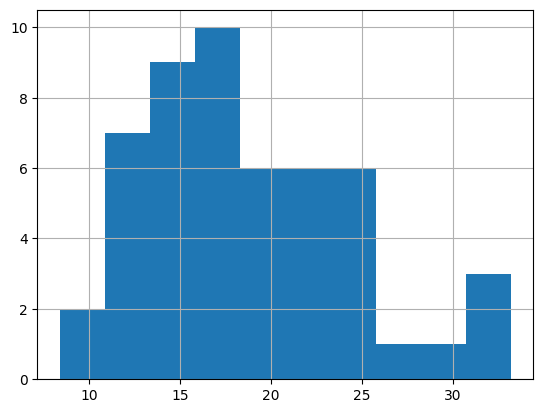

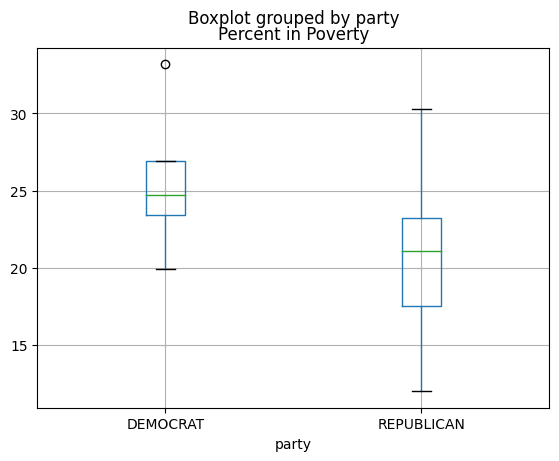

In [9]:
# EDA
poverty['Percent in Poverty'].hist() # Histogram distribution
print('Mean: ', poverty['Percent in Poverty'].mean() ) # Measures of central tendency
print('Median: ', poverty['Percent in Poverty'].median() )
print('Mode: ', poverty['Percent in Poverty'].mode() )
print(poverty.shape[0]) # 55 rows

merged_df2012.boxplot(column = 'Percent in Poverty',by = 'party')

In [10]:
az2012data = pd.merge(azdemographics2012, outcomes2012, left_on='County Name', right_on='county_name', how='outer')
outcomes2012.head(20)



,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2012,ARIZONA,AZ,APACHE,4001,US PRESIDENT,BARACK OBAMA,DEMOCRAT,17147,25848,20220315,TOTAL
1,2012,ARIZONA,AZ,COCHISE,4003,US PRESIDENT,MITT ROMNEY,REPUBLICAN,29497,49003,20220315,TOTAL
2,2012,ARIZONA,AZ,COCONINO,4005,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29257,51731,20220315,TOTAL
3,2012,ARIZONA,AZ,GILA,4007,US PRESIDENT,MITT ROMNEY,REPUBLICAN,13455,21528,20220315,TOTAL
4,2012,ARIZONA,AZ,GRAHAM,4009,US PRESIDENT,MITT ROMNEY,REPUBLICAN,8076,11855,20220315,TOTAL
5,2012,ARIZONA,AZ,GREENLEE,4011,US PRESIDENT,MITT ROMNEY,REPUBLICAN,1592,2974,20220315,TOTAL
6,2012,ARIZONA,AZ,LA PAZ,4012,US PRESIDENT,MITT ROMNEY,REPUBLICAN,3714,5717,20220315,TOTAL
7,2012,ARIZONA,AZ,MARICOPA,4013,US PRESIDENT,MITT ROMNEY,REPUBLICAN,749885,1376558,20220315,TOTAL
8,2012,ARIZONA,AZ,MOHAVE,4015,US PRESIDENT,MITT ROMNEY,REPUBLICAN,49168,70010,20220315,TOTAL
9,2012,ARIZONA,AZ,NAVAJO,4017,US PRESIDENT,MITT ROMNEY,REPUBLICAN,19884,37335,20220315,TOTAL


In [19]:
outcomes_subset2012 = outcomes2012[['county_name', 'office', 'candidate', 'party', 'candidatevotes', 'totalvotes']]
azalldata2012 = pd.merge(azdemographics2012, outcomes_subset2012, left_on='County Name', right_on='county_name', how='left')
azalldata2012 = azalldata2012.drop('county_name', axis=1)

outcomes_subset2016 = outcomes2016[['county_name', 'office', 'candidate', 'party', 'candidatevotes', 'totalvotes']]
azalldata2016 = pd.merge(azdemographics2016, outcomes_subset2016, left_on='County Name', right_on='county_name', how='left')
azalldata2016 = azalldata2016.drop('county_name', axis=1)

outcomes_subset2020 = outcomes2020[['county_name', 'office', 'candidate', 'party', 'candidatevotes', 'totalvotes']]
azalldata2020 = pd.merge(azdemographics2020, outcomes_subset2020, left_on='County Name', right_on='county_name', how='left')
azalldata2020 = azalldata2020.drop('county_name', axis=1)

<Axes: title={'center': 'more than $200,000 Percentage'}, xlabel='party'>

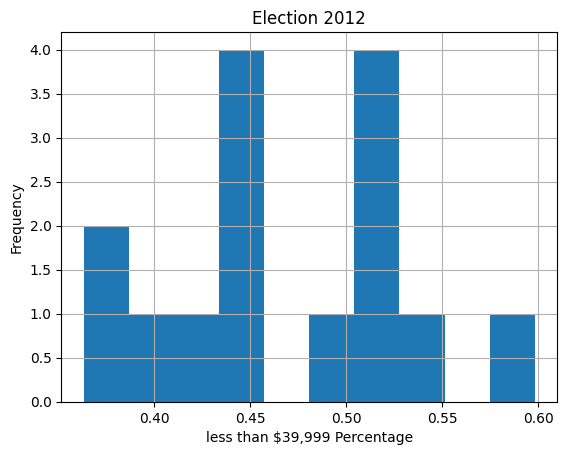

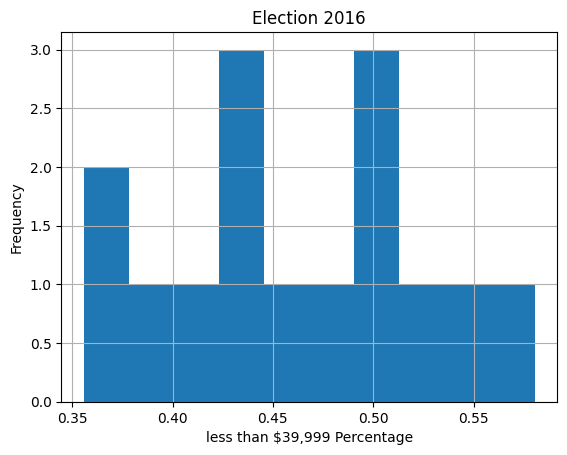

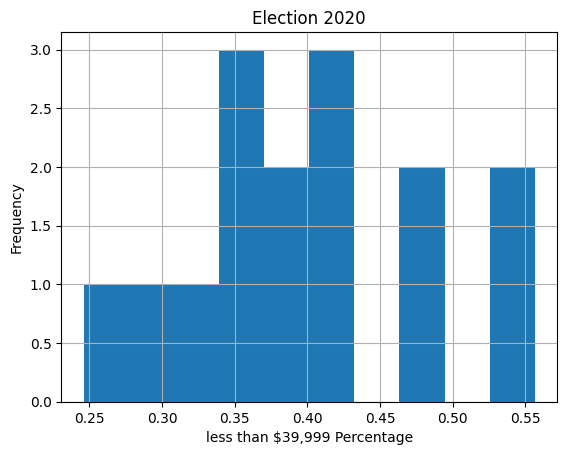

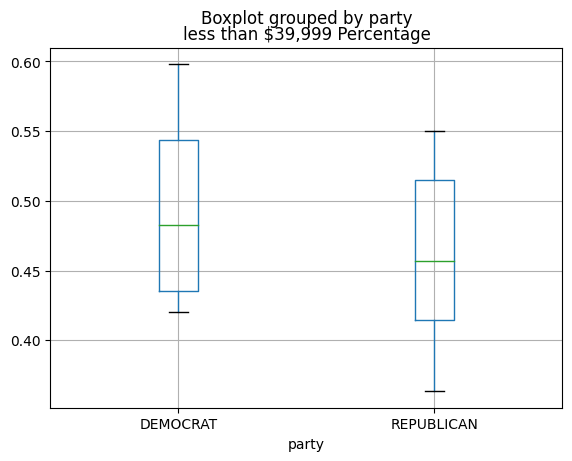

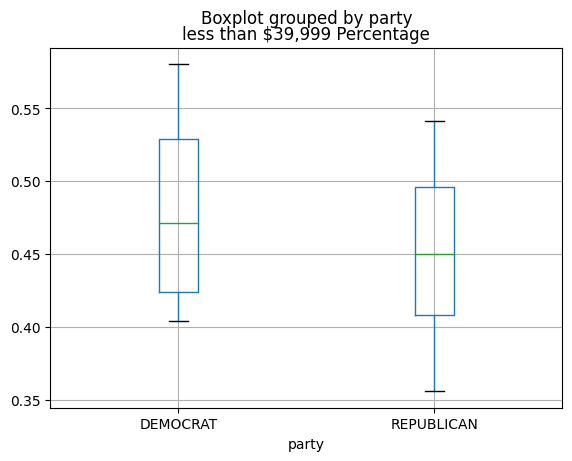

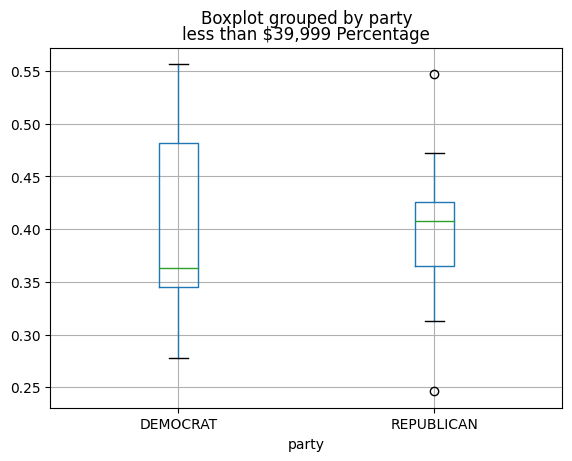

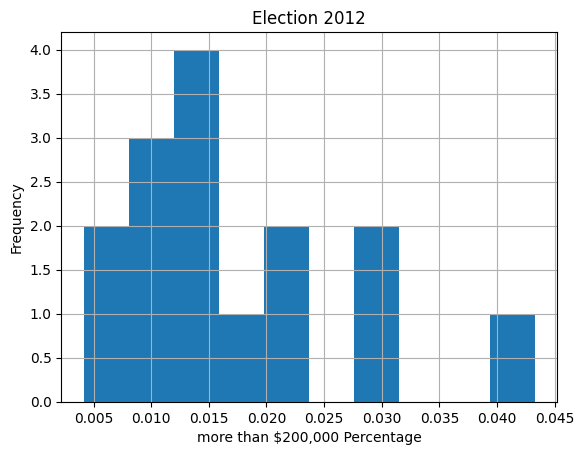

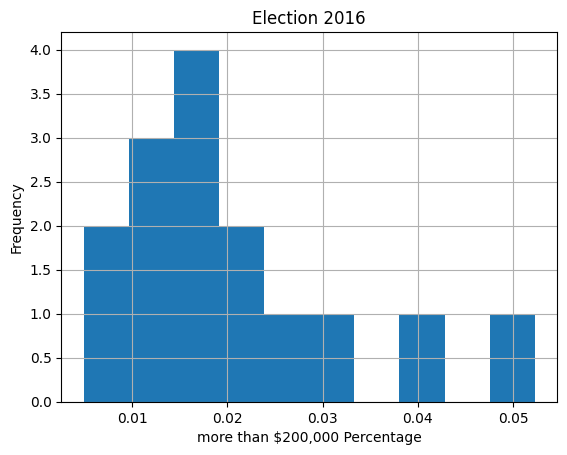

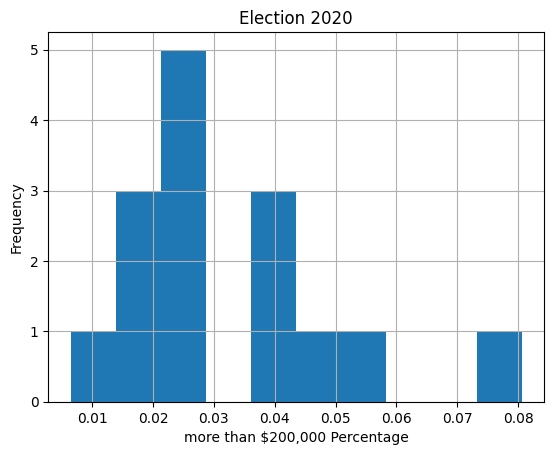

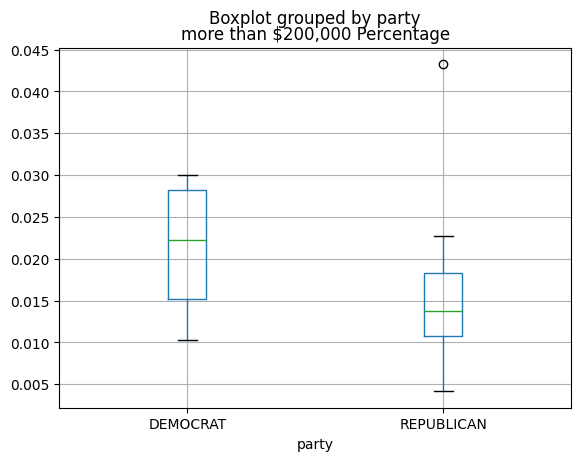

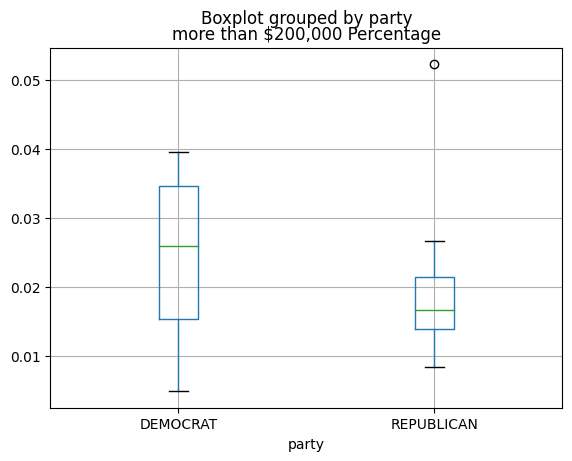

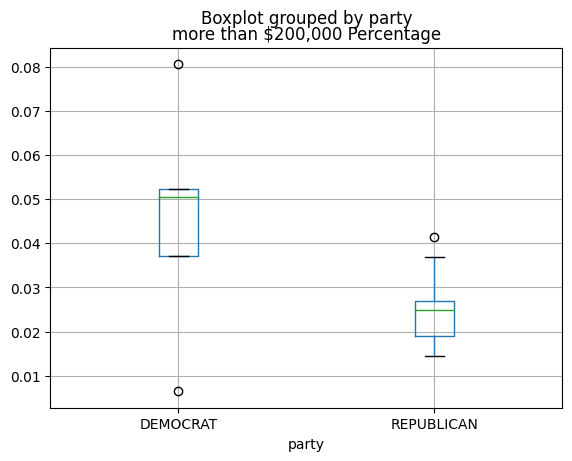

In [20]:
# EDA - Economic status
azalldata2012['less than $39,999 Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('less than $39,999 Percentage')
plt.ylabel('Frequency')
azalldata2016['less than $39,999 Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('less than $39,999 Percentage')
plt.ylabel('Frequency')
azalldata2020['less than $39,999 Percentage'].hist(figure=plt.figure()) # Histogram distribution of incomes under $40k
plt.title('Election 2020')
plt.xlabel('less than $39,999 Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'less than $39,999 Percentage',by = 'party')
azalldata2016.boxplot(column = 'less than $39,999 Percentage',by = 'party')
azalldata2020.boxplot(column = 'less than $39,999 Percentage',by = 'party') # Boxplot of proportion earning under $40k by voted party


azalldata2012['more than $200,000 Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('more than $200,000 Percentage')
plt.ylabel('Frequency')
azalldata2016['more than $200,000 Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('more than $200,000 Percentage')
plt.ylabel('Frequency')
azalldata2020['more than $200,000 Percentage'].hist(figure=plt.figure()) # Histogram distribution of incomes over $200k
plt.title('Election 2020')
plt.xlabel('more than $200,000 Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'more than $200,000 Percentage',by = 'party')
azalldata2016.boxplot(column = 'more than $200,000 Percentage',by = 'party')
azalldata2020.boxplot(column = 'more than $200,000 Percentage',by = 'party') # Boxplot of proportion earning over $200k by voted party

<Axes: title={'center': 'Doctorate degree Percentage'}, xlabel='party'>

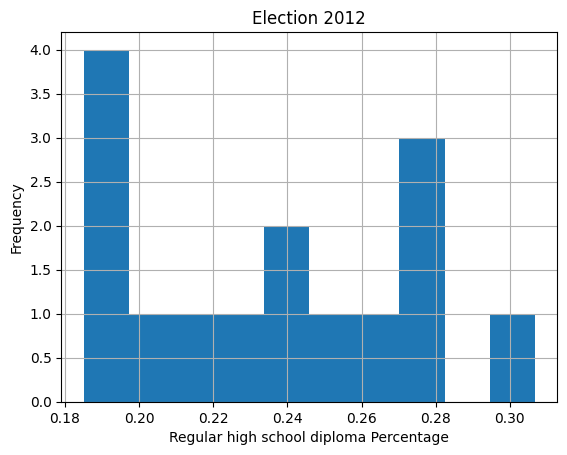

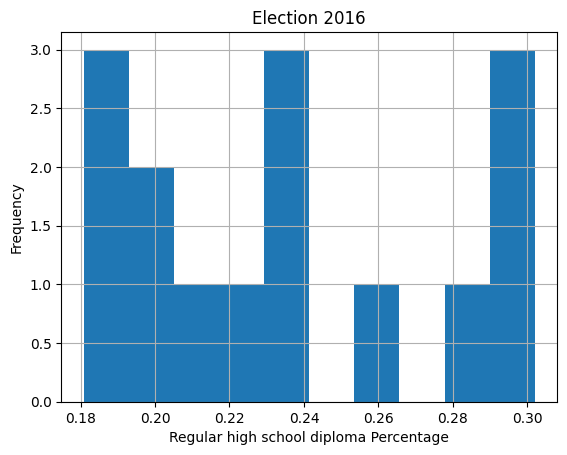

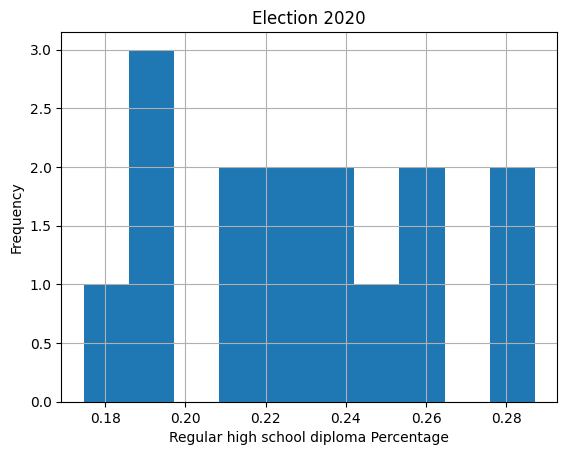

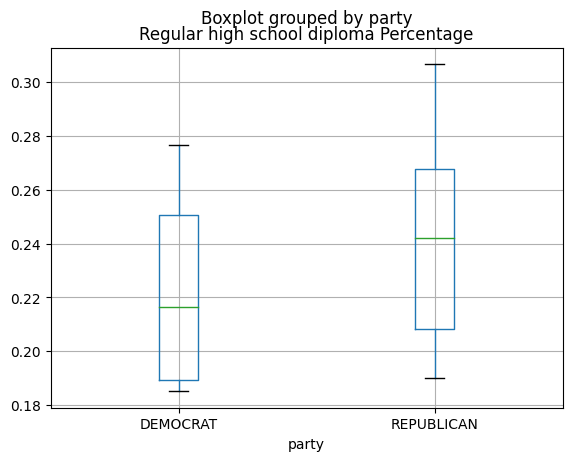

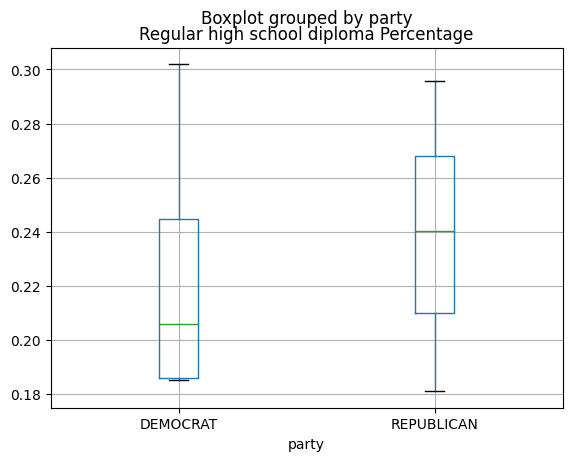

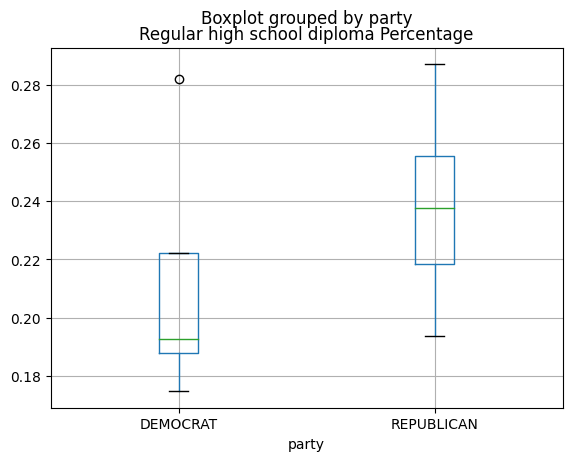

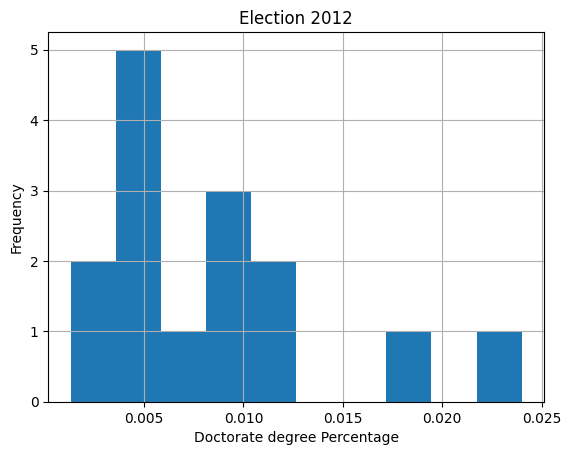

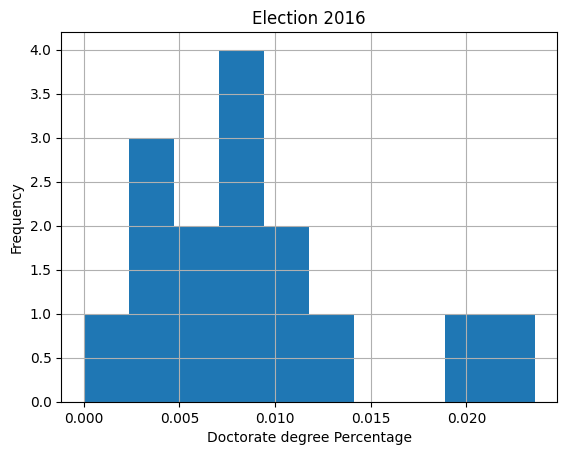

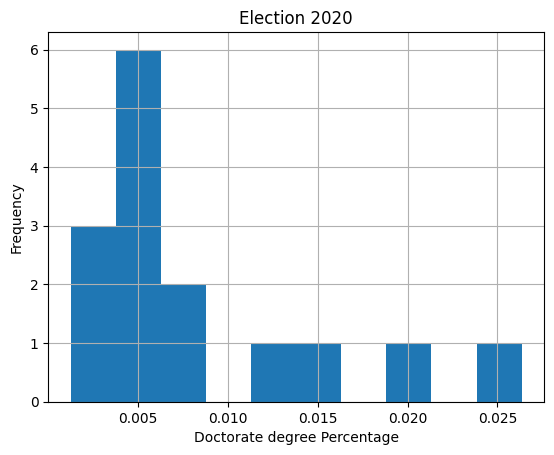

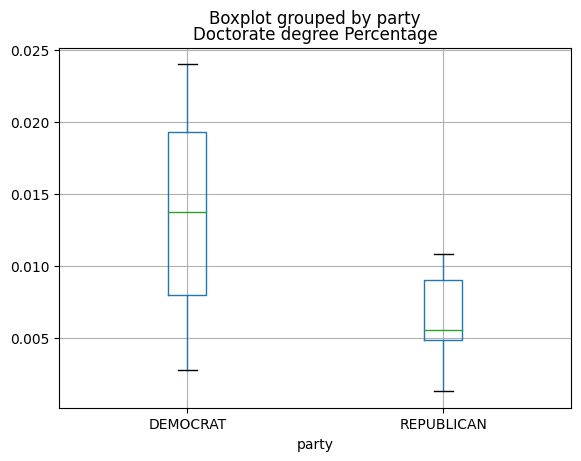

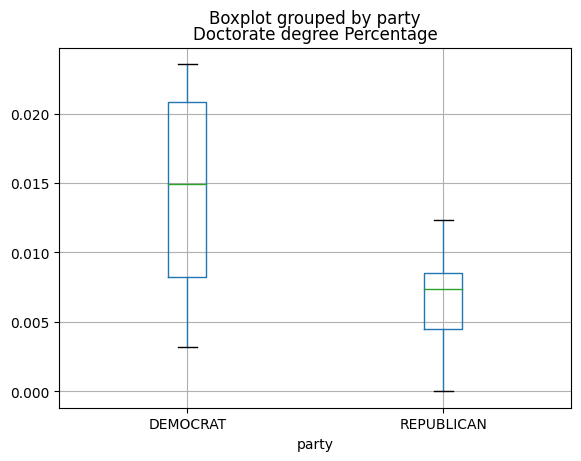

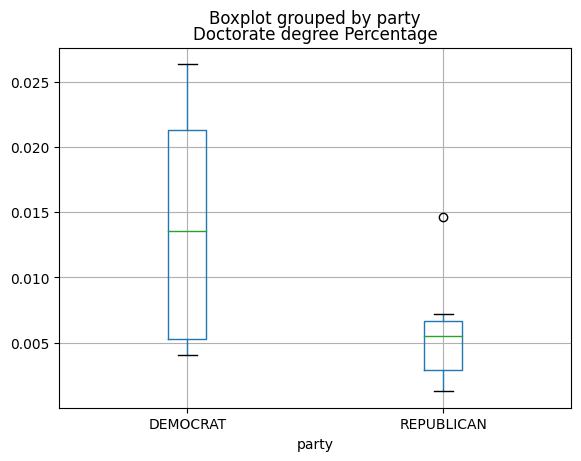

In [21]:
# EDA - Education
azalldata2012['Regular high school diploma Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')
azalldata2016['Regular high school diploma Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')
azalldata2020['Regular high school diploma Percentage'].hist(figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
azalldata2016.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
azalldata2020.boxplot(column = 'Regular high school diploma Percentage',by = 'party') # Boxplot of high school graduates by voted party


azalldata2012['Doctorate degree Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')
azalldata2016['Doctorate degree Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')
azalldata2020['Doctorate degree Percentage'].hist(figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'Doctorate degree Percentage',by = 'party')
azalldata2016.boxplot(column = 'Doctorate degree Percentage',by = 'party')
azalldata2020.boxplot(column = 'Doctorate degree Percentage',by = 'party') # Boxplot of proportion of doctors by voted party

<Axes: title={'center': 'Doctorate degree Percentage'}, xlabel='party'>

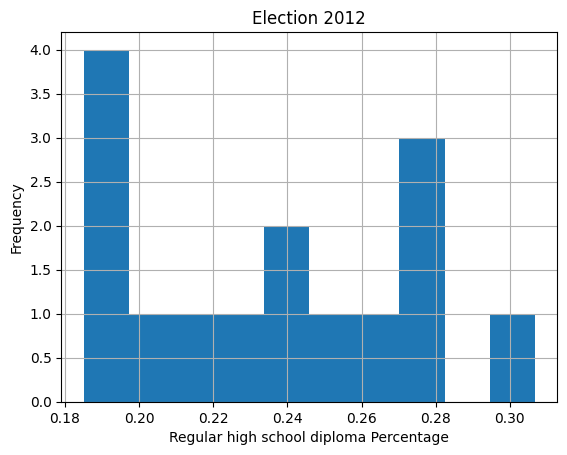

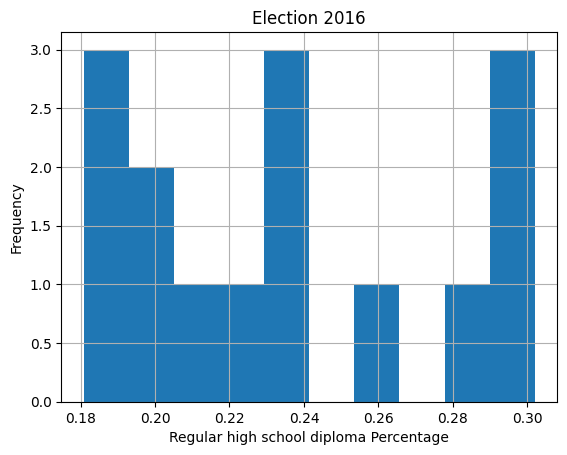

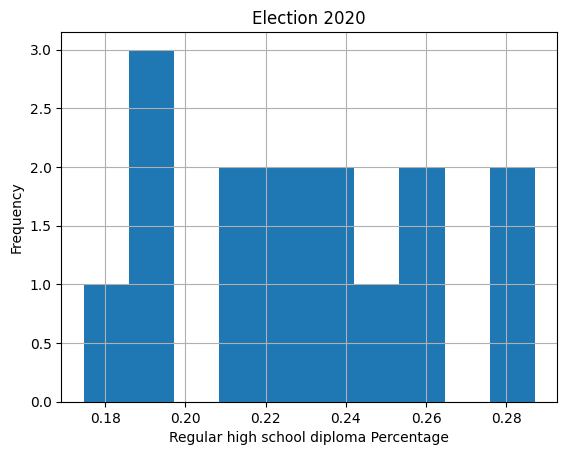

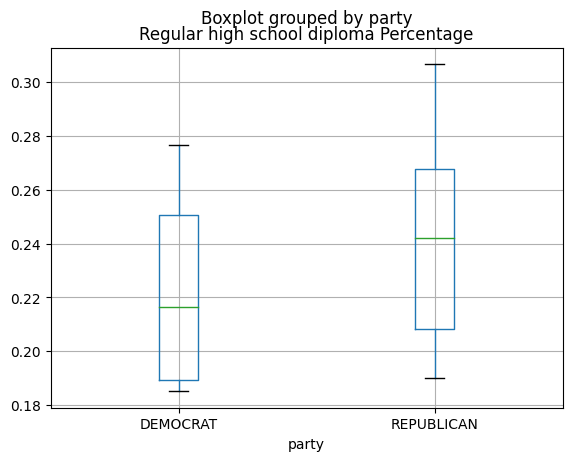

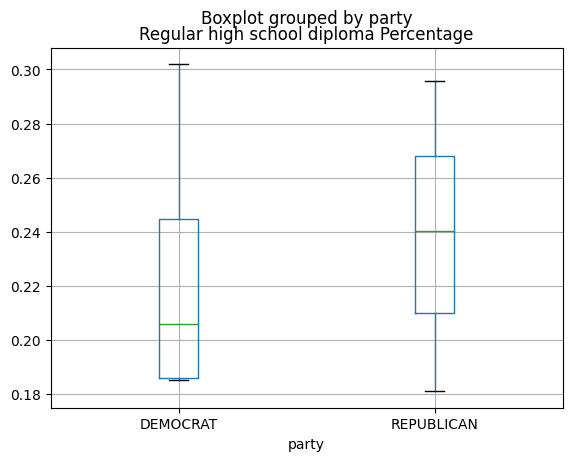

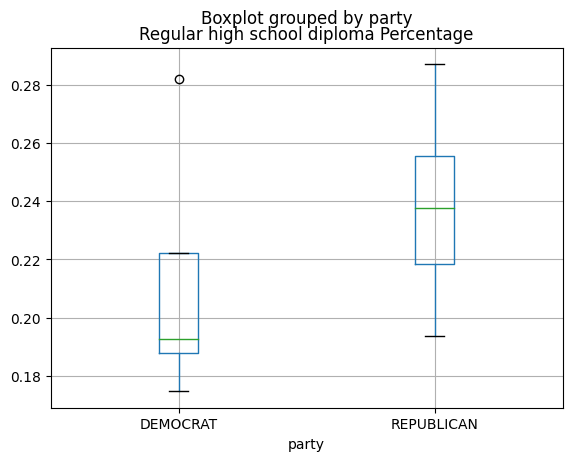

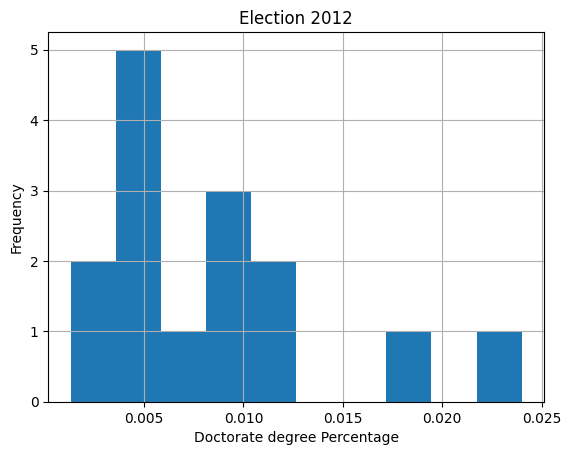

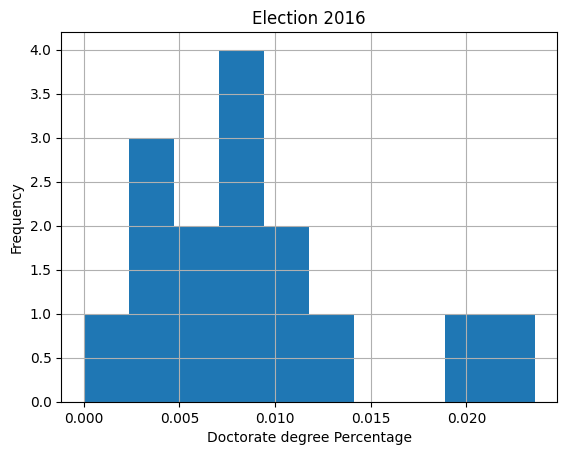

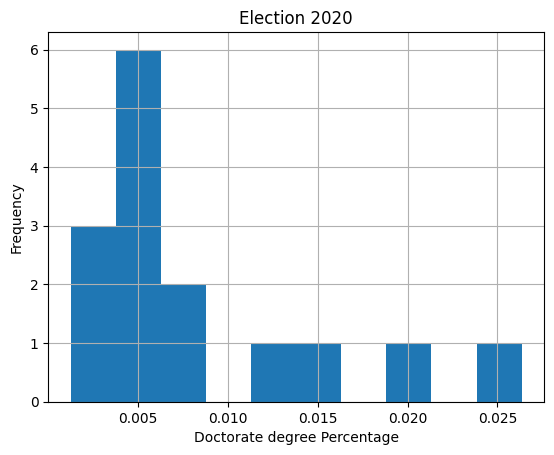

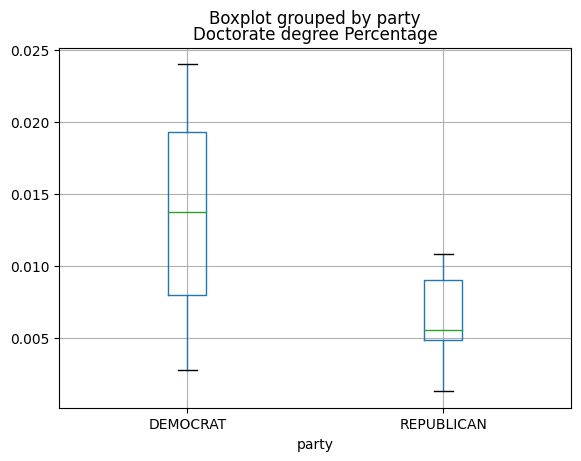

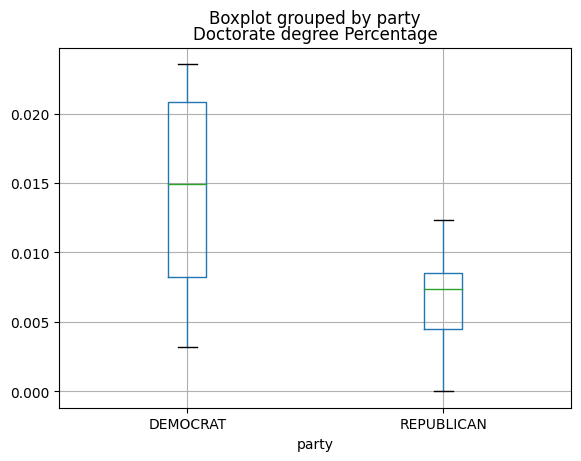

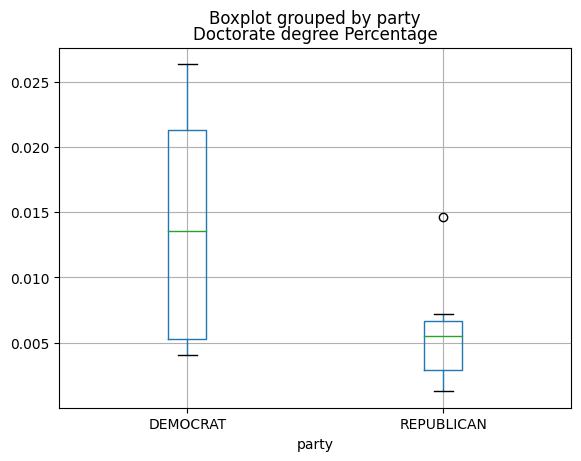

In [22]:
# EDA - Education
azalldata2012['Regular high school diploma Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')
azalldata2016['Regular high school diploma Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')
azalldata2020['Regular high school diploma Percentage'].hist(figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
azalldata2016.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
azalldata2020.boxplot(column = 'Regular high school diploma Percentage',by = 'party') # Boxplot of high school graduates by voted party


azalldata2012['Doctorate degree Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')
azalldata2016['Doctorate degree Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')
azalldata2020['Doctorate degree Percentage'].hist(figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'Doctorate degree Percentage',by = 'party')
azalldata2016.boxplot(column = 'Doctorate degree Percentage',by = 'party')
azalldata2020.boxplot(column = 'Doctorate degree Percentage',by = 'party') # Boxplot of proportion of doctors by voted party